In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold
from sklearn import feature_selection as f_select
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
import patsy

#For the categorical regression and interaction
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
#Model_1
#df = pd.read_pickle('merged_soccer_data.pkl')
total_df = pd.read_pickle('merged_soccer_data.pkl')

In [3]:
df = total_df[total_df['Year']!=2016]

## First model, knowing the future. Not a real model just proof of concept.

In [4]:
X = df[['Intercept','GF','GA']]

y = df['CalcP']

lsm1 = sm.OLS(y,X)
fit1 = lsm1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CalcP   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     7202.
Date:                Sat, 22 Apr 2017   Prob (F-statistic):               0.00
Time:                        15:24:46   Log-Likelihood:                -6029.6
No. Observations:                1984   AIC:                         1.207e+04
Df Residuals:                    1981   BIC:                         1.208e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     45.7232      0.819     55.816      0.000        44.117    47.330
GF             0.6808      0.009     76.082      0.000         0.663     0.698
GA            -0.5830      0.011    -53.448      0.000        -0.604    -0.562
==============================================================================
Omnibus:                        3.391   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                3.445
Skew:                           0.098   Prob(JB):                        0.179
Kurtosis:                       2.942   Cond. No.                         501.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
## Basic model with only goals

In [6]:
X = df[['Intercept','PREV_GF','PREV_GA']]

y = df['CalcP']

lsm2 = sm.OLS(y,X)
fit2 = lsm2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CalcP   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     853.1
Date:                Sat, 22 Apr 2017   Prob (F-statistic):          5.60e-268
Time:                        15:24:46   Log-Likelihood:                -7509.1
No. Observations:                1984   AIC:                         1.502e+04
Df Residuals:                    1981   BIC:                         1.504e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     43.0246      1.714     25.103      0.000        39.663    46.386
PREV_GF        0.5470      0.019     28.898      0.000         0.510     0.584
PREV_GA       -0.3957      0.023    -16.910      0.000        -0.442    -0.350
==============================================================================
Omnibus:                       10.451   Durbin-Watson:                   1.357
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.561
Skew:                           0.158   Prob(JB):                      0.00509
Kurtosis:                       3.166   Cond. No.                         497.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
## Model with previous seasons goals and categorical leagues variable

In [8]:
X = df[['Intercept','PREV_GF','PREV_GA','League[T.LaLiga]', 'League[T.Ligue_1]',
       'League[T.Premier_League]', 'League[T.Serie_A]']]

y = df['CalcP']

lsm3_l = sm.OLS(y,X)
fit_3league = lsm3_l.fit()
fit_3league.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CalcP   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     309.5
Date:                Sat, 22 Apr 2017   Prob (F-statistic):          4.98e-280
Time:                        15:24:46   Log-Likelihood:                -7468.3
No. Observations:                1984   AIC:                         1.495e+04
Df Residuals:                    1977   BIC:                         1.499e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   39.8176      1.924     20.692      0.000        36.044    43.592
PREV_GF                      0.5395      0.020     27.367      0.000         0.501     0.578
PREV_GA                     -0.4051      0.025    -16.444      0.000        -0.453    -0.357
League[T.LaLiga]             5.8499      0.733      7.978      0.000         4.412     7.288
League[T.Ligue_1]            4.6352      0.765      6.057      0.000         3.134     6.136
League[T.Premier_League]     5.6107      0.733      7.658      0.000         4.174     7.048
League[T.Serie_A]            3.4697      0.801      4.334      0.000         1.900     5.040
==============================================================================
Omnibus:                       14.216   Durbin-Watson:                   1.413
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.469
Skew:                           0.189   Prob(JB):                     0.000721
Kurtosis:                       3.180   Cond. No.                         586.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
## Model with above as well as transfer information.

In [10]:
X = df[['Intercept','PREV_GF','PREV_GA','League[T.LaLiga]', 'League[T.Ligue_1]',
        'League[T.Premier_League]', 'League[T.Serie_A]',
        'Arrival_Sum', 'Departure_Sum', 'Arrival_Paid', 'Departure_Paid','Arrival_Loan','Departure_Loan', 
        'Arrival_Free', 'Departure_Free']]

y = df['CalcP']

lsm_all = sm.OLS(y,X)
fit_all = lsm_all.fit()
fit_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CalcP   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     162.0
Date:                Sat, 22 Apr 2017   Prob (F-statistic):          7.58e-315
Time:                        15:24:46   Log-Likelihood:                -7365.3
No. Observations:                1984   AIC:                         1.476e+04
Df Residuals:                    1969   BIC:                         1.484e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   46.3265      1.976     23.447      0.000        42.452    50.201
PREV_GF                      0.4103      0.021     19.170      0.000         0.368     0.452
PREV_GA                     -0.3348      0.024    -13.763      0.000        -0.382    -0.287
League[T.LaLiga]             5.0703      0.760      6.675      0.000         3.581     6.560
League[T.Ligue_1]            4.4520      0.783      5.689      0.000         2.917     5.987
League[T.Premier_League]     5.5867      0.870      6.422      0.000         3.881     7.293
League[T.Serie_A]            2.1519      0.910      2.364      0.018         0.366     3.938
Arrival_Sum               1.263e-07   1.32e-08      9.559      0.000         1e-07  1.52e-07
Departure_Sum            -3.641e-08    1.9e-08     -1.918      0.055     -7.36e-08  8.15e-10
Arrival_Paid                -0.6680      0.122     -5.482      0.000        -0.907    -0.429
Departure_Paid               0.2604      0.146      1.786      0.074        -0.025     0.546
Arrival_Loan                -0.6592      0.100     -6.570      0.000        -0.856    -0.462
Departure_Loan               0.4840      0.068      7.072      0.000         0.350     0.618
Arrival_Free                -0.5914      0.083     -7.142      0.000        -0.754    -0.429
Departure_Free               0.0693      0.077      0.896      0.371        -0.082     0.221
==============================================================================
Omnibus:                        9.817   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.144
Skew:                           0.141   Prob(JB):                      0.00627
Kurtosis:                       3.209   Cond. No.                     3.17e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Determining alpha for lasso regression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

kf = KFold(n_splits=5, shuffle=True)

all_scores=[]
alphas=[1e-5,1e-3,1e-1,0,1,100]

for a in alphas:
    mse_score=[]
    for train, test in kf.split(X):
        x_tr=X.iloc[train]
        y_tr=y.iloc[train]
        x_te=X.iloc[test]
        y_te=y.iloc[test]
        est=Lasso(alpha=a)
        est.fit(x_tr,y_tr)
        mse=np.mean((y_te-est.predict(x_te))**2)
        mse_score.append(mse)
    all_scores.append(sum(mse_score))
    
for i in range(len(all_scores)):
    print(all_scores[i], alphas[i])
    print()
print(all_scores)

499.19001648831346 1e-05

497.6769290861622 0.001

505.9513265352098 0.1

498.5399321850737 0

516.4623195034911 1

839.4253305245973 100

[499.19001648831346, 497.6769290861622, 505.9513265352098, 498.5399321850737, 516.4623195034911, 839.4253305245973]


/Users/stephenchou/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/stephenchou/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/stephenchou/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [18]:
## Lasso regression with alpha = 0 as determined above

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

est=Lasso(alpha=0)
est.fit(X_train,y_train)
est.alpha

zipped=zip(X.columns,est.coef_)
features=sorted(zipped,key = lambda t: abs(t[1]),reverse=True)
for f in features:
    print ("{:20.20s} {:7.3f}".format(f[0], f[1]))

League[T.Premier_Lea   5.808
League[T.LaLiga]       5.413
League[T.Ligue_1]      3.826
League[T.Serie_A]      2.275
Arrival_Loan          -0.667
Arrival_Paid          -0.632
Arrival_Free          -0.548
Departure_Loan         0.491
PREV_GF                0.402
PREV_GA               -0.354
Departure_Paid         0.326
Departure_Free         0.109
Arrival_Sum            0.000
Departure_Sum         -0.000
Intercept              0.000


/Users/stephenchou/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/stephenchou/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/stephenchou/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## Lasso regression doesn't yield more information than standard OLS regression, so we'll go with that and remove low p-value variables

In [13]:
X = df[['Intercept','PREV_GF','PREV_GA','League[T.LaLiga]', 'League[T.Ligue_1]',
        'League[T.Premier_League]', 'League[T.Serie_A]',
        'Arrival_Sum', 'Arrival_Paid', 'Arrival_Loan','Departure_Loan', 
        'Arrival_Free']]

y = df['CalcP']

lsm_all_ref = sm.OLS(y,X)
fit_all_ref = lsm_all_ref.fit()
fit_all_ref.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CalcP   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     205.4
Date:                Sat, 22 Apr 2017   Prob (F-statistic):          3.85e-317
Time:                        15:24:47   Log-Likelihood:                -7368.0
No. Observations:                1984   AIC:                         1.476e+04
Df Residuals:                    1972   BIC:                         1.483e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   46.6909      1.958     23.847      0.000        42.851    50.531
PREV_GF                      0.4087      0.021     19.506      0.000         0.368     0.450
PREV_GA                     -0.3294      0.024    -13.655      0.000        -0.377    -0.282
League[T.LaLiga]             4.7647      0.744      6.405      0.000         3.306     6.224
League[T.Ligue_1]            4.3200      0.776      5.568      0.000         2.799     5.841
League[T.Premier_League]     5.5413      0.866      6.399      0.000         3.843     7.240
League[T.Serie_A]            2.0860      0.895      2.331      0.020         0.331     3.841
Arrival_Sum               1.172e-07   1.22e-08      9.639      0.000      9.33e-08  1.41e-07
Arrival_Paid                -0.6007      0.113     -5.337      0.000        -0.821    -0.380
Arrival_Loan                -0.6573      0.099     -6.615      0.000        -0.852    -0.462
Departure_Loan               0.4881      0.068      7.160      0.000         0.354     0.622
Arrival_Free                -0.5645      0.079     -7.189      0.000        -0.719    -0.411
==============================================================================
Omnibus:                       10.222   Durbin-Watson:                   1.428
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.692
Skew:                           0.139   Prob(JB):                      0.00477
Kurtosis:                       3.227   Cond. No.                     2.75e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

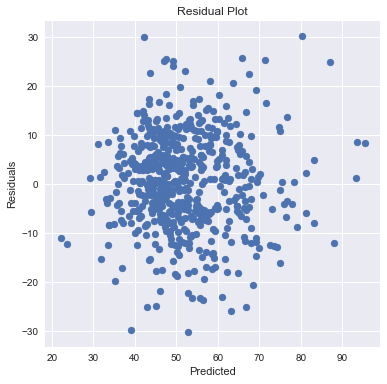

In [20]:
X = df#[['Intercept','PREV_GF','PREV_GA','Arrival_Sum', 'Departure_Sum', 'Arrival_Count',
      # 'Departure_Count','League[T.LaLiga]', 'League[T.Ligue_1]',
      # 'League[T.Premier_League]', 'League[T.Serie_A]','Year']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

fig = plt.figure(figsize=(6,6))
ax = plt.axes()
#sig_cols = list(set(sig_cols))
est = LinearRegression()
est.fit(X_train[['Intercept','PREV_GF','PREV_GA','League[T.LaLiga]', 'League[T.Ligue_1]',
        'League[T.Premier_League]', 'League[T.Serie_A]',
        'Arrival_Sum', 'Arrival_Paid', 'Arrival_Loan','Departure_Loan', 
        'Arrival_Free']], y_train)
y_pred = est.predict(X_test[['Intercept','PREV_GF','PREV_GA','League[T.LaLiga]', 'League[T.Ligue_1]',
        'League[T.Premier_League]', 'League[T.Serie_A]',
        'Arrival_Sum', 'Arrival_Paid', 'Arrival_Loan','Departure_Loan', 
        'Arrival_Free']])
Residuals = y_pred - y_test
#plt.scatter(X_test['Year'],Residuals )
#ax.set(xlabel='Year',ylabel='Residuals');
#ax.set_title('Residual from model by Year')

ax.set(xlabel='Predicted',ylabel='Residuals');
ax.set_title('Residual Plot')
plt.scatter(y_pred,Residuals)


In [21]:
est.score(X_test[['Intercept','PREV_GF','PREV_GA','League[T.LaLiga]', 'League[T.Ligue_1]',
        'League[T.Premier_League]', 'League[T.Serie_A]',
        'Arrival_Sum', 'Arrival_Paid', 'Arrival_Loan','Departure_Loan', 
        'Arrival_Free']], y_test)

0.54376785218999069

## 2016 Premier league example

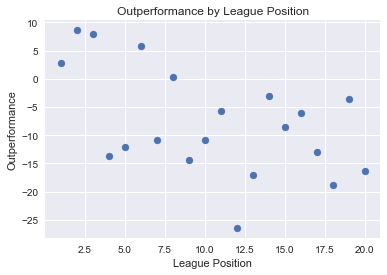

In [16]:
prem_2016_df = total_df[(total_df['Year']==2016)&(total_df['League']=='Premier League')]

y_pred = est.predict(prem_2016_df[['Intercept','PREV_GF','PREV_GA','League[T.LaLiga]', 'League[T.Ligue_1]',
        'League[T.Premier_League]', 'League[T.Serie_A]',
        'Arrival_Sum', 'Arrival_Paid', 'Arrival_Loan','Departure_Loan', 
        'Arrival_Free']])

est_True = LinearRegression()
est_True.fit(X_train[['Intercept','GF','GA','MaxP']], y_train)
y_pred_true = est_True.predict(prem_2016_df[['Intercept','GF','GA','MaxP']])

prem = prem_2016_df.ix[:,:'CalcP']
prem['PredP']=y_pred / 38 * 96/3
prem['PredP_True']=y_pred_true #/ 38 * 96/3
prem['Pred_Diff']=-(prem['PredP']-prem['PredP_True'])
prem.drop('Club_Short', axis=1, inplace=True)
prem=prem.round(1)
prem

ax = plt.axes()
ax.set(xlabel='League Position',ylabel='Outperformance');
ax.set_title('Outperformance by League Position')
plt.scatter(prem['Position'],prem['Pred_Diff'])


In [17]:
#looking at some crazy outliers.
not_2016_df = total_df[(total_df['Year']!=2016)]

y_pred = est.predict(not_2016_df[['Intercept','PREV_GF','PREV_GA','League[T.LaLiga]', 'League[T.Ligue_1]',
        'League[T.Premier_League]', 'League[T.Serie_A]',
        'Arrival_Sum', 'Arrival_Paid', 'Arrival_Loan','Departure_Loan', 
        'Arrival_Free']])

subs = not_2016_df.ix[:,:'CalcP']
subs['PredP']=y_pred
subs['PD']=abs(subs['CalcP']-subs['PredP'])
subs.drop('Club_Short', axis=1, inplace=True)
subs=subs.round(1)
subs=subs.sort_values('PD',ascending=False)
subs.head(10)

,Position,Season,Club,GF,GA,GD,MaxP,CalcP,PredP,PD
1431,12,15/16,Valencia CF,46,48,-2,114,44,81.4,37.4
1016,1,95/96,Atlético Madrid,75,32,43,126,87,52.0,35.0
170,5,00/01,Ipswich Town,57,42,15,114,66,32.1,33.9
1079,20,97/98,Sporting Gijón,31,80,-49,114,13,45.5,32.5
1015,20,94/95,CD Logroñés,15,79,-64,114,15,47.4,32.4
2306,1,11/12,HSC Montpellier,68,34,34,114,82,49.8,32.2
469,4,15/16,Manchester City,71,41,30,114,66,98.0,32.0
475,10,15/16,Chelsea FC,59,53,6,114,50,80.9,30.9
2270,5,09/10,HSC Montpellier,50,40,10,114,69,38.5,30.5
1017,2,95/96,Valencia CF,77,51,26,126,83,52.8,30.2
